In [1]:
import sys
sys.path.append("../ml_models/")

import numpy as np

from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

from discriminant_analysis import DiscriminantAnalysis

%load_ext autoreload
%autoreload 2

In [2]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
y_preds = {}
for model in ['Linear', 'Quadratic']:
    da = DiscriminantAnalysis(model=model)
    da.fit(X_train, y_train)
    y_pred = da.predict(X_test)
    y_preds[model] = y_pred
    print(model, " Discriminant Analysis accuracy score: ", da.score(X_test, y_test))

Linear  Discriminant Analysis accuracy score:  0.9210526315789473
Quadratic  Discriminant Analysis accuracy score:  1.0


In [5]:
print(*y_preds, 'Actual', sep='|')
preds = list(y_preds.values())
for i in range(y_test.shape[0]):
    print(preds[0][i], ' ' * 4, 
          preds[1][i], ' ' * 7,
          y_test[i])

Linear|Quadratic|Actual
1      1         1
0      0         0
2      2         2
1      1         1
1      1         1
0      0         0
1      1         1
1      2         2
1      1         1
1      1         1
1      2         2
0      0         0
0      0         0
0      0         0
0      0         0
1      1         1
2      2         2
1      1         1
1      1         1
2      2         2
0      0         0
1      2         2
0      0         0
2      2         2
2      2         2
2      2         2
2      2         2
2      2         2
0      0         0
0      0         0
0      0         0
0      0         0
1      1         1
0      0         0
0      0         0
2      2         2
1      1         1
0      0         0


In [6]:
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    random_state=0
)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

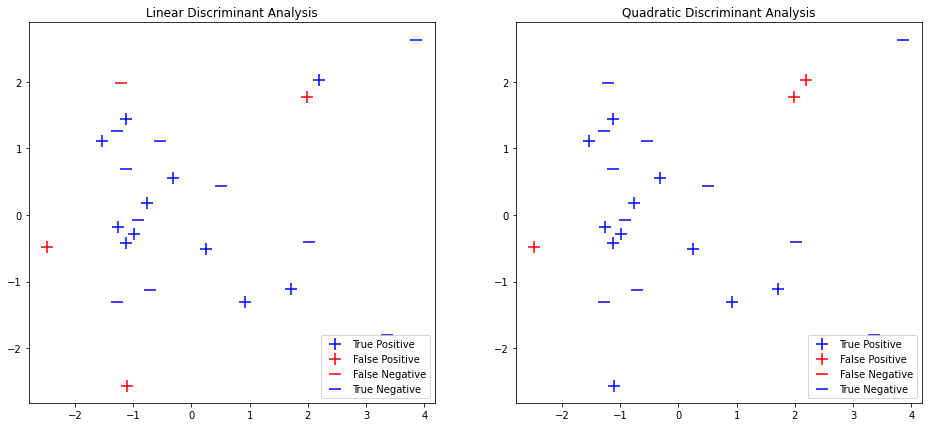

In [7]:
fig = plt.figure(figsize=(16, 7))
for i, model in enumerate(['Linear', 'Quadratic']):
    da = DiscriminantAnalysis(model=model)
    da.fit(X_train, y_train)
    y_pred = da.predict(X_test)
    ax = fig.add_subplot(1, 2, i+1)
    i_p = np.where(y_test == 1)[0]
    i_n = np.where(y_test == 0)[0]
    i_tp = i_p[np.in1d(i_p, np.where(y_pred == 1))]
    i_fp = i_p[np.in1d(i_p, np.where(y_pred == 0))]
    i_fn = i_n[np.in1d(i_n, np.where(y_pred == 1))]
    i_tn = i_n[np.in1d(i_n, np.where(y_pred == 0))]
    ax.set_title((model + ' Discriminant Analysis'))
    ax.scatter(X[i_tp, 0], X[i_tp, 1], marker='+', s=150, c='b', label='True Positive')
    ax.scatter(X[i_fp, 0], X[i_fp, 1], marker='+', s=150, c='r', label='False Positive')
    ax.scatter(X[i_fn, 0], X[i_fn, 1], marker='_', s=150, c='r', label='False Negative')
    ax.scatter(X[i_tn, 0], X[i_tn, 1], marker='_', s=150, c='b', label='True Negative')
    plt.legend()